#Menghubungkan google colab dengan kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"ihsandarojatulula","key":"fb1f2b09d45894e5aa146b98dad83830"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d mssmartypants/water-quality

water-quality.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!mkdir water-quality
!unzip water-quality.zip -d water-quality
!ls water-quality

mkdir: cannot create directory ‘water-quality’: File exists
Archive:  water-quality.zip
replace water-quality/waterQuality1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: waterQuality1.csv


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Memanggil datasets

In [9]:
df = pd.read_csv('water-quality/waterQuality1.csv')

#Deskripsi datasets

In [10]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


Check datasets

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [12]:
df.dtypes

aluminium      float64
ammonia         object
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe         object
dtype: object

In [13]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

mengganti datatype object ke float

In [14]:
df['ammonia'] = df['ammonia'].replace('#NUM!',pd.np.nan)
df['ammonia'] = df['ammonia'].astype('float')

<ipython-input-14-32159bcdf8a4>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['ammonia'] = df['ammonia'].replace('#NUM!',pd.np.nan)


In [15]:
df['is_safe'] = df['is_safe'].replace('#NUM!',pd.np.nan)
df['is_safe'] = df['is_safe'].astype('float')
df['is_safe'].dtype

<ipython-input-15-21268fc24f84>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['is_safe'] = df['is_safe'].replace('#NUM!',pd.np.nan)


dtype('float64')

In [16]:
df.corr()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,0.067369,0.225773,0.294145,-0.099911,0.369309,0.353218,0.168612,-0.009784,-0.078238,...,0.020792,-0.003810,0.237307,-0.003306,0.363069,0.243217,-0.003672,0.334993,0.014711,0.333974
ammonia,0.067369,1.000000,0.046783,0.070099,-0.006422,0.104775,0.124782,0.015953,-0.028221,0.063603,...,-0.037065,0.006483,-0.063309,0.020884,0.090928,0.050401,0.029897,0.075547,0.014635,-0.022919
arsenic,0.225773,0.046783,1.000000,0.362945,0.334682,0.356559,0.312475,-0.036444,0.003792,0.035688,...,-0.087756,0.027554,0.305005,-0.015404,0.332279,0.218204,-0.007009,0.307837,0.001455,-0.123362
barium,0.294145,0.070099,0.362945,1.000000,-0.037803,0.446928,0.415972,0.065426,-0.018548,0.101259,...,-0.042888,-0.011331,0.312711,0.005987,0.462234,0.286569,0.035242,0.431606,-0.002440,0.090858
cadmium,-0.099911,-0.006422,0.334682,-0.037803,1.000000,-0.144370,-0.157766,-0.109024,0.004880,-0.092431,...,-0.034959,0.020194,-0.015682,-0.016174,-0.149344,-0.099259,0.010145,-0.155408,-0.005633,-0.256034
chloramine,0.369309,0.104775,0.356559,0.446928,-0.144370,1.000000,0.555938,0.119059,0.004400,0.154510,...,-0.030479,-0.001551,0.379685,-0.021472,0.588769,0.388806,0.011399,0.522447,-0.007658,0.186704
chromium,0.353218,0.124782,0.312475,0.415972,-0.157766,0.555938,1.000000,0.113043,-0.002284,0.142041,...,-0.050501,-0.012793,0.335708,-0.022787,0.524532,0.315271,0.030539,0.510768,-0.005526,0.182306
copper,0.168612,0.015953,-0.036444,0.065426,-0.109024,0.119059,0.113043,1.000000,0.011683,0.149110,...,0.121765,0.002332,0.162093,0.017626,0.104564,0.026215,-0.003267,0.089333,0.006978,0.029498
flouride,-0.009784,-0.028221,0.003792,-0.018548,0.004880,0.004400,-0.002284,0.011683,1.000000,0.014134,...,0.011905,-0.008140,-0.016669,-0.004400,-0.016191,0.007688,0.022629,0.014554,0.016792,0.006550
bacteria,-0.078238,0.063603,0.035688,0.101259,-0.092431,0.154510,0.142041,0.149110,0.014134,1.000000,...,-0.027525,-0.033920,0.246252,-0.004471,0.147652,0.099298,-0.006971,0.148225,0.044839,-0.022077


In [17]:
df.duplicated().sum()

0

In [18]:
df.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7999.000000,7996.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,...,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7996.000000
mean,0.666158,14.278212,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,...,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673,0.114057
std,1.265145,8.878930,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,...,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [19]:
df['ammonia']= df['ammonia'].fillna(0)
df['is_safe']= df['is_safe'].fillna(0)

In [20]:
df['is_safe'].value_counts()

0.0    7087
1.0     912
Name: is_safe, dtype: int64

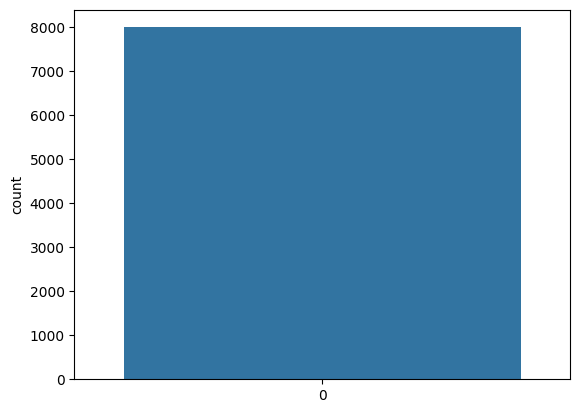

In [23]:
sns.countplot(df['is_safe'])
plt.show()

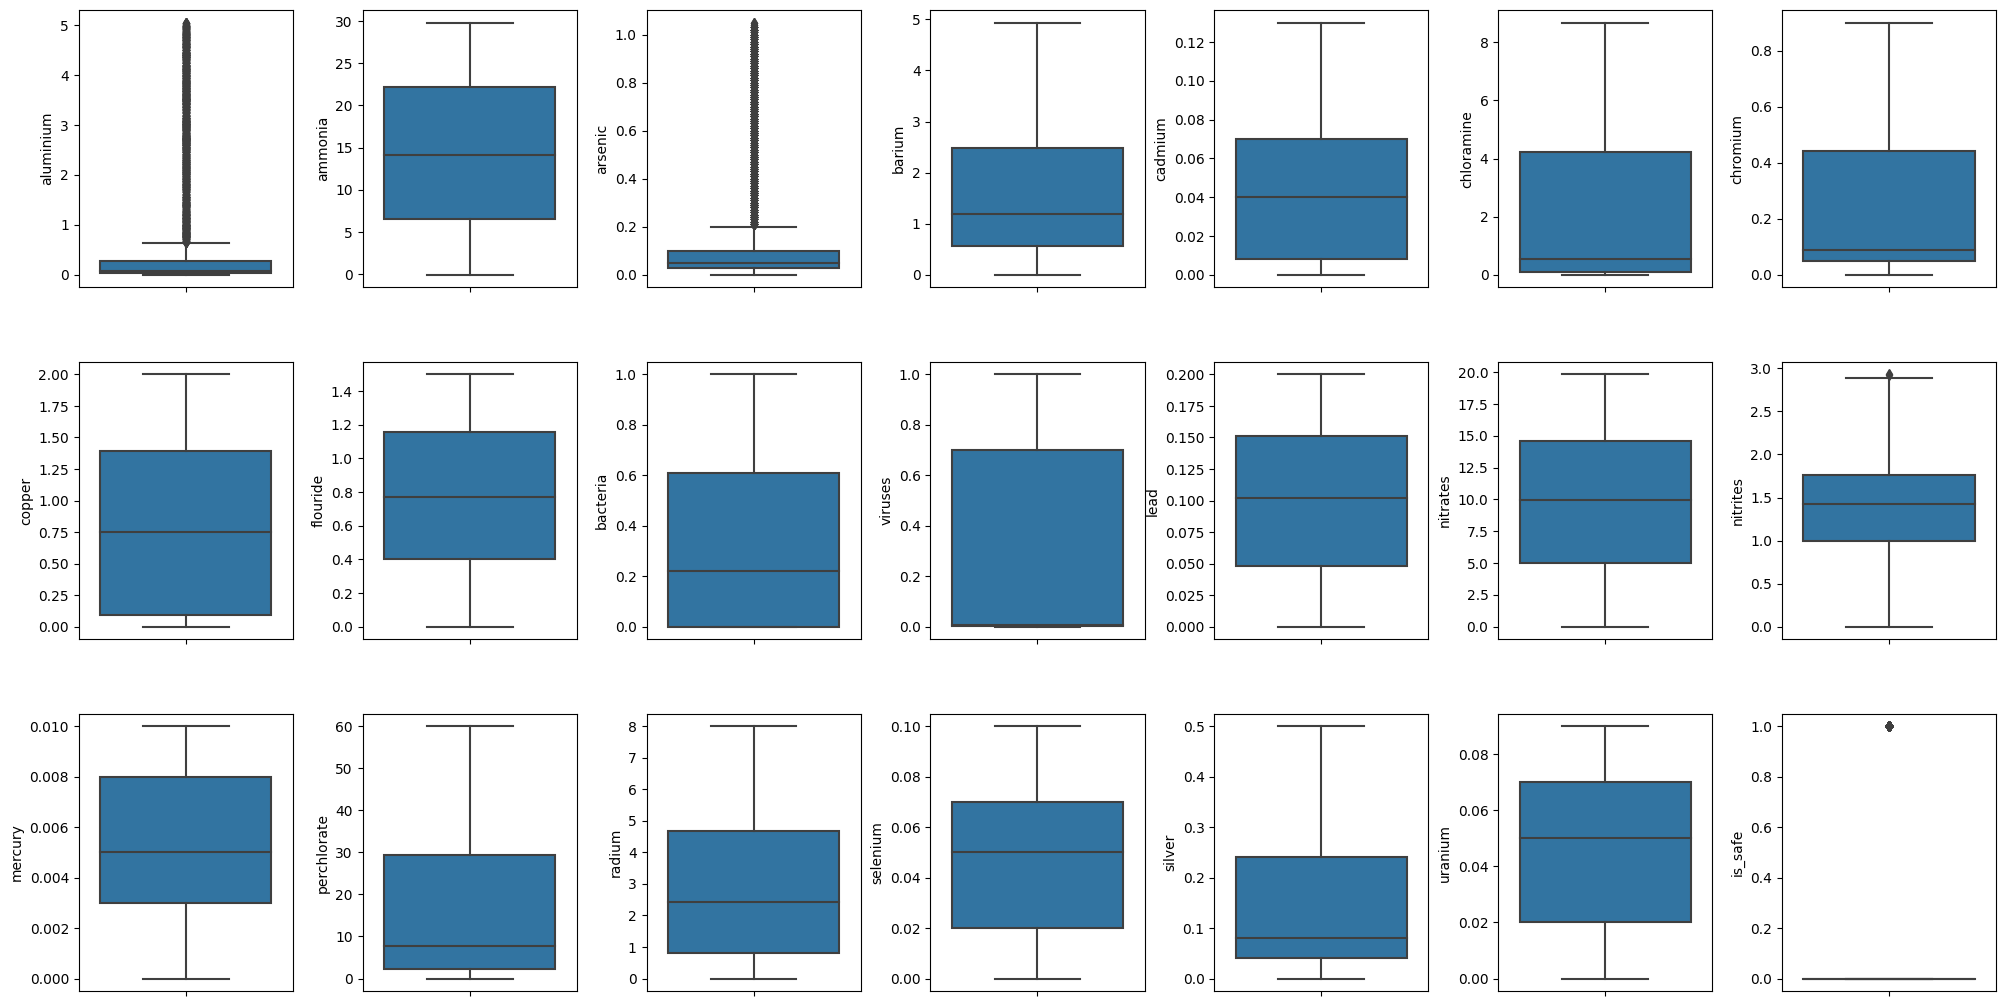

In [24]:
fig, ax = plt.subplots(ncols=7, nrows=3, figsize=(20,10))
count = 0
ax = ax.flatten()
for i, value in df.items():
     sns.boxplot(y = i, data=df, ax=ax[count])
     count += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

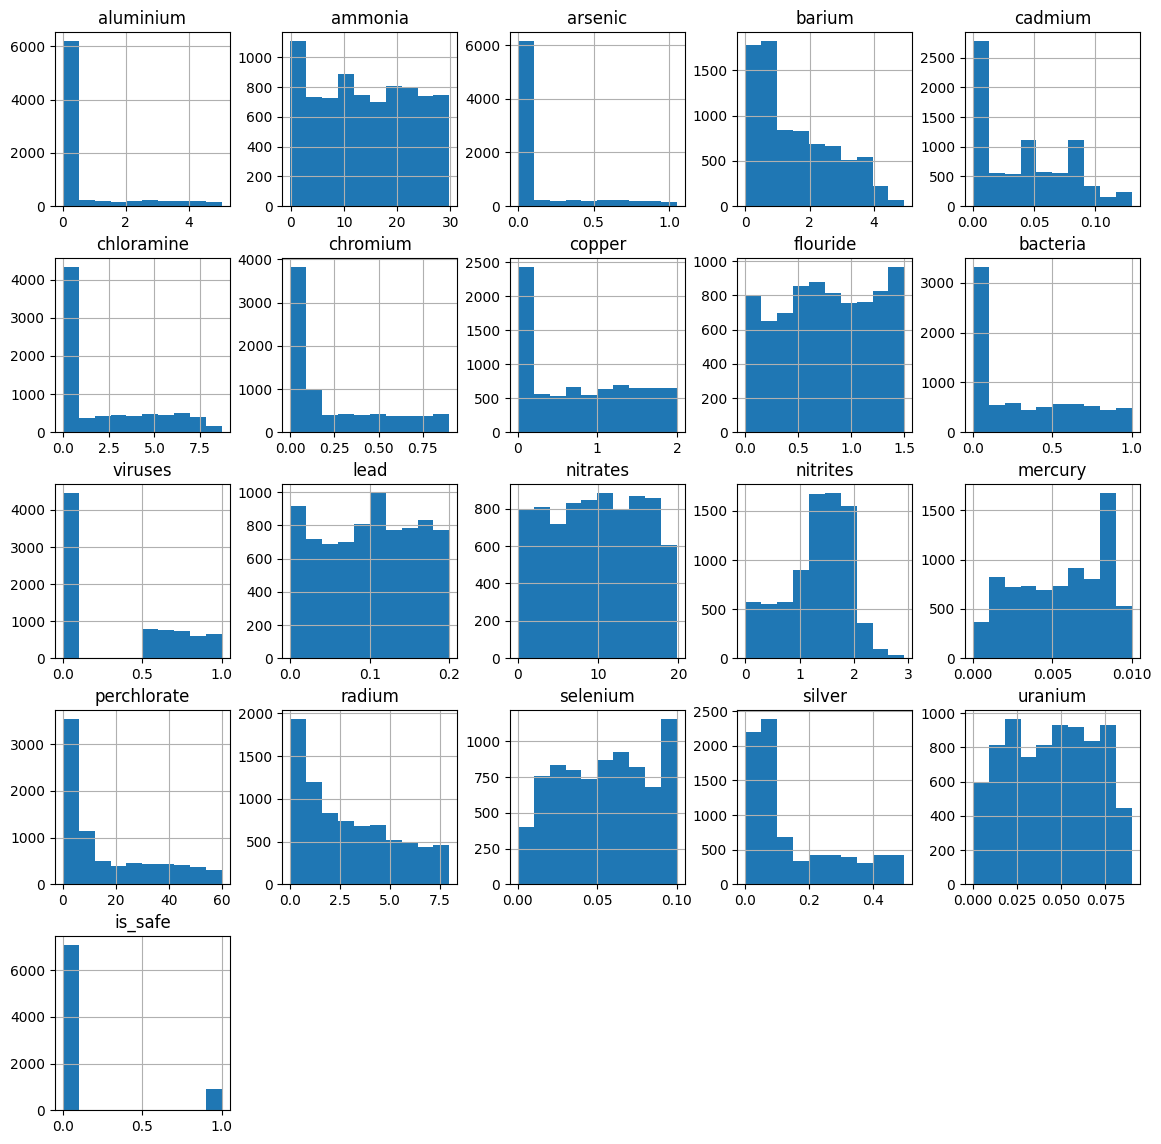

In [25]:
df.hist(figsize=(14, 14))
plt.show()

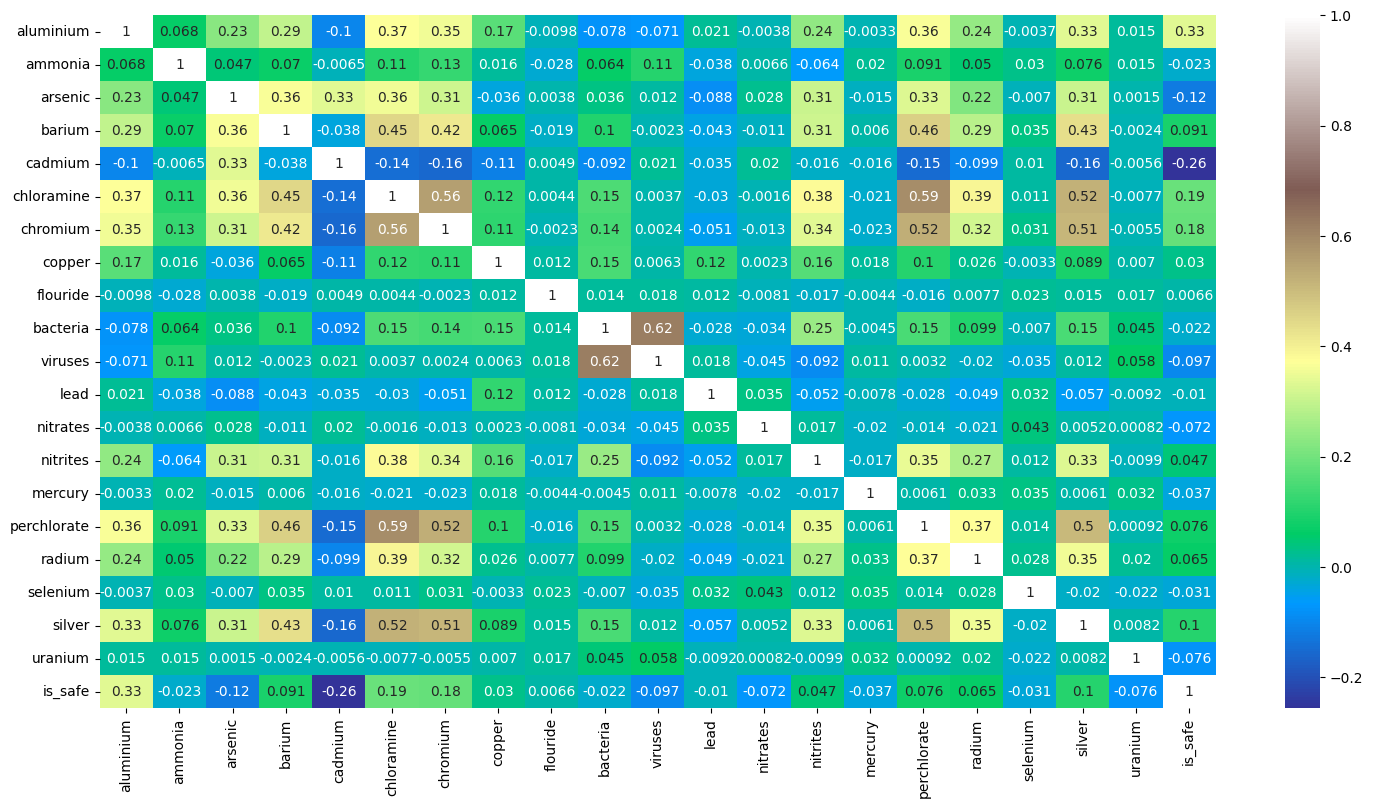

In [26]:
plt.figure(figsize=(18, 9))
sns.heatmap(df.corr(), annot=True, cmap='terrain')
plt.show()

#Memisahkan datasets

In [27]:
X = df.drop(['is_safe'],axis = 1)
Y = df['is_safe']

In [28]:
print(X)

      aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7994       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
7998       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  viruses   lead  nitrates  nitrites  mercury  \
0     

In [29]:
print(Y)

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
7994    1.0
7995    1.0
7996    1.0
7997    1.0
7998    1.0
Name: is_safe, Length: 7999, dtype: float64


In [30]:
X_train , X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.2, random_state=42)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(7999, 20) (6399, 20) (1600, 20)


#Membuat model training

In [32]:
model = LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#Evaluasi model

In [33]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [34]:
print('Akurasi data training :', training_data_accuracy)

Akurasi data training : 0.9012345679012346


In [35]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [37]:
print('Akurasi data training :', testing_data_accuracy)

Akurasi data training : 0.8975


#Membuat model prediksi

In [38]:
input_data = (01.01,14.02,0.04,0.58,8,4.24,0.53,0.02,0.99,0.05,3,78,14.16,1.11,6,50.28,07.07,0.07,0.44,0.01)
input_data_as_numpy_array = np.array(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('Kualitas air tidak aman')
else:
    print('Kualitas air aman')

[0.]
Kualitas air tidak aman


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [39]:
input_data = (0.06,12.44,0.01,0.68,0.04,0.67,0.04,0.08,0.61,0,1,0.03,1.43,0.34,9,0.28,0.58,0,0.01,0.04)
input_data_as_numpy_array = np.array(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('Kualitas air tidak aman')
else:
    print('Kualitas air aman')

[0.]
Kualitas air tidak aman


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#Simpan model

In [40]:
import pickle

In [41]:
filename = 'water_quality_lr.sav'
pickle.dump(model, open(filename, 'wb'))